In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
mydata=pd.read_csv('AusApparalSales4thQrt2020.csv')
mydata.head(20)

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
5,1-Oct-2020,Afternoon,WA,Men,10,25000
6,1-Oct-2020,Afternoon,WA,Women,3,7500
7,1-Oct-2020,Afternoon,WA,Seniors,11,27500
8,1-Oct-2020,Evening,WA,Kids,15,37500
9,1-Oct-2020,Evening,WA,Men,15,37500


In [3]:
#data wrangling

In [4]:
mydata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [5]:
mydata.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [6]:
mydata.isna()

,Date,Time,State,Group,Unit,Sales
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
7555,False,False,False,False,False,False
7556,False,False,False,False,False,False
7557,False,False,False,False,False,False
7558,False,False,False,False,False,False


In [7]:
mydata.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [8]:
#there is no null data in the dataset

In [9]:
mydata.duplicated().sum()

np.int64(0)

In [10]:
mydata.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

In [11]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [12]:
mydata.shape

(7560, 6)

Since there is not null values and no duplicates, there is no need to treat them

In [13]:
##data wrangling approach-normalization and standardization

<Axes: ylabel='Density'>

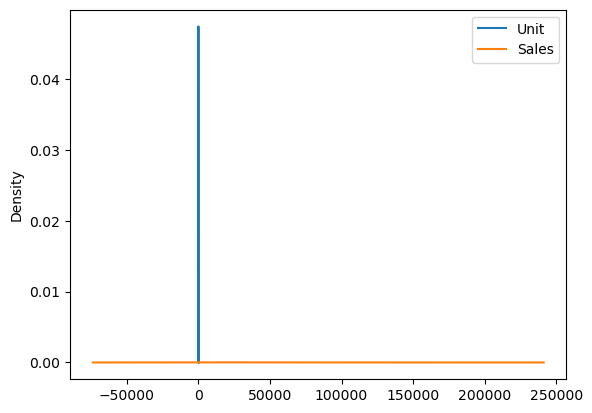

In [14]:
mydata[['Unit','Sales']].plot.kde()

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
ss = StandardScaler()

In [17]:
newdata=mydata[['Unit','Sales']]

In [18]:
data_transformed = ss.fit_transform(newdata)

In [19]:
type(data_transformed)

numpy.ndarray

In [20]:
newdata = pd.DataFrame(data_transformed,columns = ['Unit','Sales'])

In [21]:
newdata

,Unit,Sales
0,-0.775581,-0.775581
1,-0.775581,-0.775581
2,-1.085645,-1.085645
3,-0.232969,-0.232969
4,-1.163162,-1.163162
...,...,...
7555,-0.310485,-0.310485
7556,-0.232969,-0.232969
7557,-0.232969,-0.232969
7558,-0.543033,-0.543033


<Axes: ylabel='Density'>

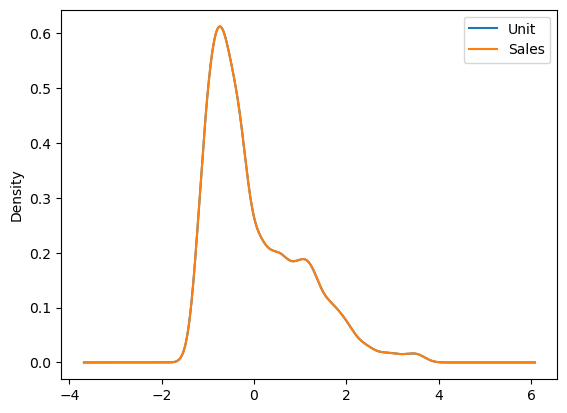

In [22]:
newdata.plot.kde()

<Axes: ylabel='Count'>

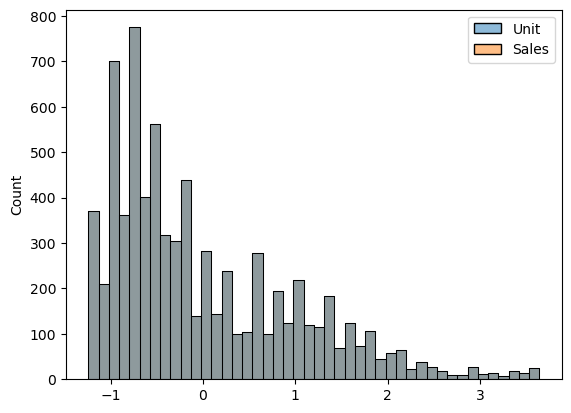

In [23]:
sns.histplot(newdata)

In [24]:
###performing normalization as it is preferred

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
minmaxobj=MinMaxScaler()

In [27]:
normalized=minmaxobj.fit_transform(newdata)

In [28]:
testdf=pd.DataFrame(normalized,columns=newdata.columns)

In [29]:
testdf

,Unit,Sales
0,0.095238,0.095238
1,0.095238,0.095238
2,0.031746,0.031746
3,0.206349,0.206349
4,0.015873,0.015873
...,...,...
7555,0.190476,0.190476
7556,0.206349,0.206349
7557,0.206349,0.206349
7558,0.142857,0.142857


<Axes: ylabel='Density'>

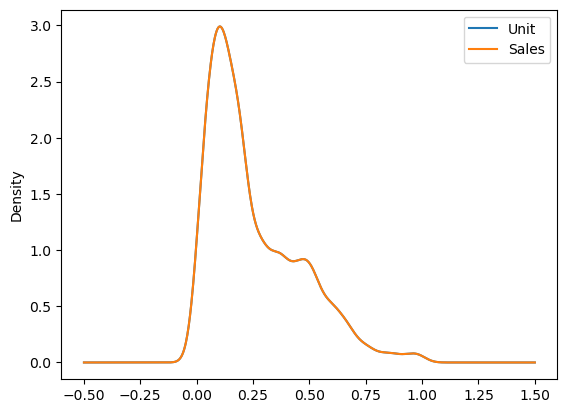

In [30]:
testdf.plot.kde()

In [31]:
mydata

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


In [32]:
#pplication of the GroupBy() function for either data chunking or merging


In [33]:
salesofstates = (
    mydata.groupby('State').agg(Total_Sales=('Sales', 'sum')))
          
          


print(salesofstates)


       Total_Sales
State             
NSW       74970000
NT        22580000
QLD       33417500
SA        58857500
TAS       22760000
VIC      105565000
WA        22152500


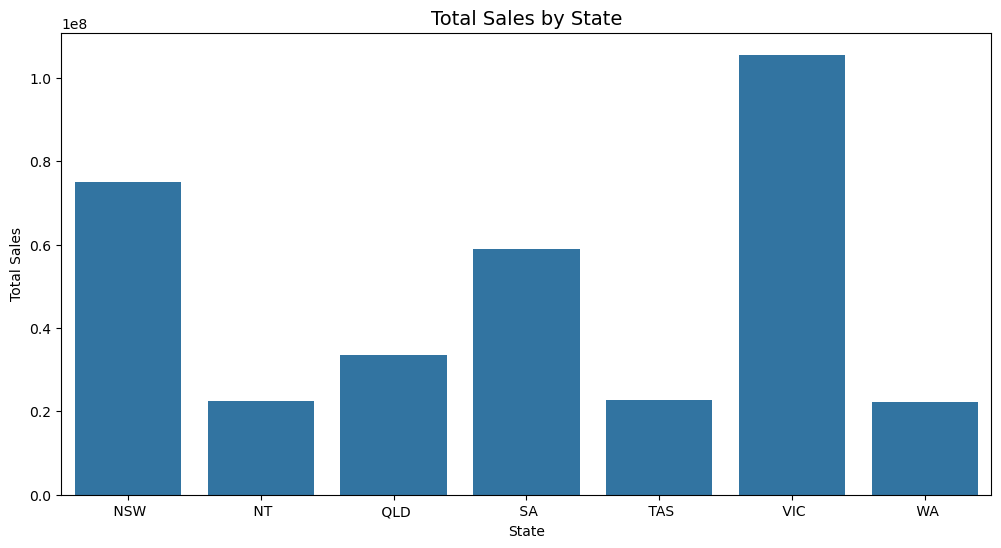

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x=salesofstates.index, y=salesofstates['Total_Sales'])
plt.title("Total Sales by State", fontsize=14)
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.show()

In [35]:
#DATA ANALSYS

In [36]:


newdata=mydata[['Unit','Sales']]##sliced only numerical variables for data analysis

In [37]:
newdata

,Unit,Sales
0,8,20000
1,8,20000
2,4,10000
3,15,37500
4,3,7500
...,...,...
7555,14,35000
7556,15,37500
7557,15,37500
7558,11,27500


In [38]:
#Perform descriptive statistical analysis on the data in the Sales and Unit
#columns. Utilize techniques such as mean, median, mode, and standard
#deviation for this analysis.

In [39]:
newdata.mean()

Unit        18.005423
Sales    45013.558201
dtype: float64

In [40]:
newdata.median()

Unit        14.0
Sales    35000.0
dtype: float64

In [41]:
newdata.mode()

,Unit,Sales
0,9,22500


In [42]:
newdata.std()

Unit        12.901403
Sales    32253.506944
dtype: float64

In [43]:
#Identify the group with the highest sales and the group with the lowest sales based on the data provided.


In [44]:
sales_group = mydata.groupby('Group')
sales_group.apply(lambda x: x.sort_values(by = 'Sales', ascending=False))

/var/folders/j_/1182b84s479dx0175nz8csfh0000gn/T/ipykernel_8236/4022199183.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sales_group.apply(lambda x: x.sort_values(by = 'Sales', ascending=False))


Date        Time State   Group  Unit   Sales
Group                                                          
Kids  7432  29-Dec-2020   Afternoon   VIC    Kids    65  162500
      6340  16-Dec-2020   Afternoon   VIC    Kids    65  162500
      6928  23-Dec-2020   Afternoon   VIC    Kids    63  157500
      7008  24-Dec-2020     Morning   VIC    Kids    63  157500
      7180  26-Dec-2020   Afternoon   VIC    Kids    63  157500
...                 ...         ...   ...     ...   ...     ...
Women 3366  11-Nov-2020   Afternoon    WA   Women     2    5000
      3358  10-Nov-2020     Evening   TAS   Women     2    5000
      3286  10-Nov-2020     Evening    WA   Women     2    5000
      3686  14-Nov-2020     Morning   TAS   Women     2    5000
      3130   8-Nov-2020     Evening    NT   Women     2    5000

[7560 rows x 6 columns]

In [45]:
sales_group.apply(lambda x: x.sort_values(by = 'Sales', ascending=False)).max()#highest sale

/var/folders/j_/1182b84s479dx0175nz8csfh0000gn/T/ipykernel_8236/40689738.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sales_group.apply(lambda x: x.sort_values(by = 'Sales', ascending=False)).max()#highest sale


Date     9-Oct-2020
Time        Morning
State            WA
Group         Women
Unit             65
Sales        162500
dtype: object

In [46]:
sales_group.apply(lambda x: x.sort_values(by = 'Sales', ascending=False)).min()#lowest sale

/var/folders/j_/1182b84s479dx0175nz8csfh0000gn/T/ipykernel_8236/435385429.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sales_group.apply(lambda x: x.sort_values(by = 'Sales', ascending=False)).min()#lowest sale


Date     1-Dec-2020
Time      Afternoon
State           NSW
Group          Kids
Unit              2
Sales          5000
dtype: object

In [47]:
#Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.


In [48]:
from datetime import datetime 
from matplotlib import dates
%matplotlib inline

In [49]:
mydata['Date'] = pd.to_datetime(mydata['Date'])

In [50]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [51]:
#spliting Date into Day,Month,Year
mydata['Day'] = pd.DatetimeIndex(mydata['Date']).day
mydata['Month']=pd.DatetimeIndex(mydata['Date']).month
mydata['Year']=pd.DatetimeIndex(mydata['Date']).year

In [52]:
mydata

,Date,Time,State,Group,Unit,Sales,Day,Month,Year
0,2020-10-01,Morning,WA,Kids,8,20000,1,10,2020
1,2020-10-01,Morning,WA,Men,8,20000,1,10,2020
2,2020-10-01,Morning,WA,Women,4,10000,1,10,2020
3,2020-10-01,Morning,WA,Seniors,15,37500,1,10,2020
4,2020-10-01,Afternoon,WA,Kids,3,7500,1,10,2020
...,...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,30,12,2020
7556,2020-12-30,Evening,TAS,Kids,15,37500,30,12,2020
7557,2020-12-30,Evening,TAS,Men,15,37500,30,12,2020
7558,2020-12-30,Evening,TAS,Women,11,27500,30,12,2020


In [53]:
mydata.shape

(7560, 9)

In [54]:
mydata.describe()

,Date,Unit,Sales,Day,Month,Year
count,7560,7560.000000,7560.000000,7560.000000,7560.000000,7560.0
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201,15.500000,11.000000,2020.0
min,2020-10-01 00:00:00,2.000000,5000.000000,1.000000,10.000000,2020.0
25%,2020-10-23 00:00:00,8.000000,20000.000000,8.000000,10.000000,2020.0
50%,2020-11-15 12:00:00,14.000000,35000.000000,15.500000,11.000000,2020.0
75%,2020-12-08 00:00:00,26.000000,65000.000000,23.000000,12.000000,2020.0
max,2020-12-30 00:00:00,65.000000,162500.000000,30.000000,12.000000,2020.0
std,NaN,12.901403,32253.506944,8.656014,0.816551,0.0


In [55]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
 6   Day     7560 non-null   int32         
 7   Month   7560 non-null   int32         
 8   Year    7560 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(2), object(3)
memory usage: 443.1+ KB


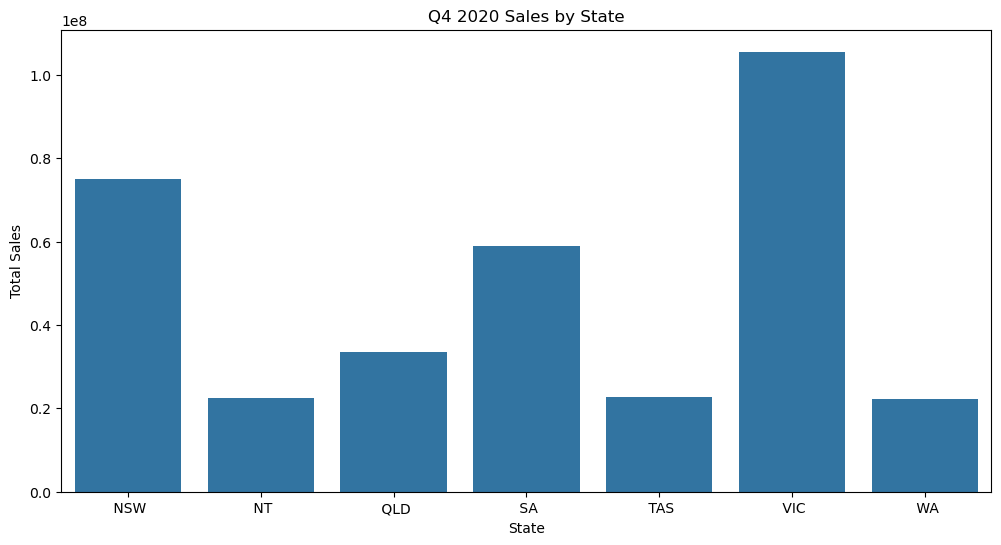

In [56]:
import seaborn as sns

# Prepare dataframe for seaborn
Q4 = mydata[(mydata['Date'] >= '2020-10-01') & (mydata['Date'] <= '2020-12-31')] \
                .groupby('State', as_index=False)['Sales'].sum()

# Plot with Seaborn
plt.figure(figsize=(12,6))
sns.barplot(data=Q4, x='State', y='Sales')
plt.title("Q4 2020 Sales by State")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.show()


In [57]:
mydata['Date'] = pd.to_datetime(mydata['Date'])
mydata.set_index('Date', inplace=True) 


In [58]:
mydata.columns

Index(['Time', 'State', 'Group', 'Unit', 'Sales', 'Day', 'Month', 'Year'], dtype='object')

/var/folders/j_/1182b84s479dx0175nz8csfh0000gn/T/ipykernel_8236/407368942.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Sales', data=monthly, palette="Blues")


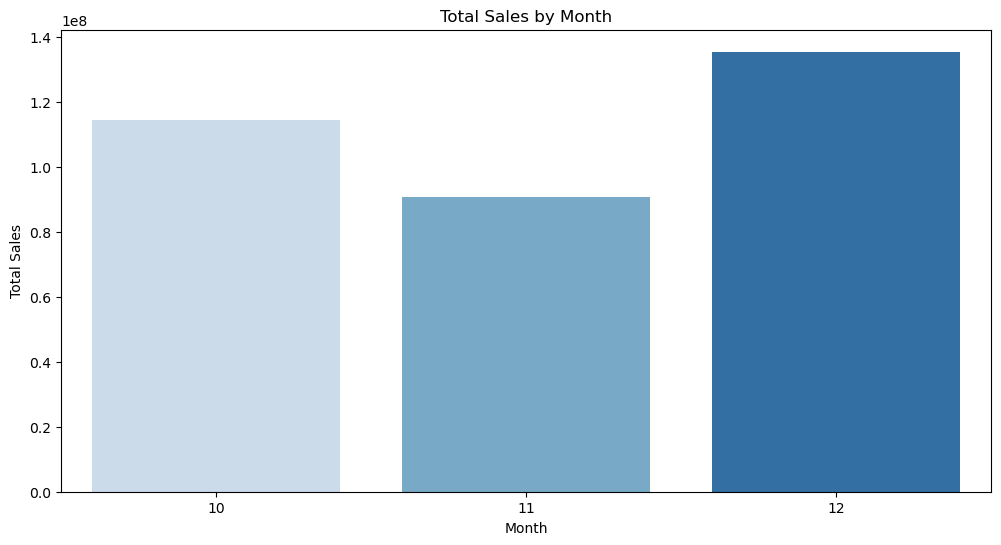

In [59]:
monthly = mydata.groupby('Month', as_index=False)['Sales'].sum()

plt.figure(figsize=(12,6))
sns.barplot(x='Month', y='Sales', data=monthly, palette="Blues")
plt.title("Total Sales by Month")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.show()


In [60]:
#DATA VISUALIZATION

State-wise sales analysis for different demographic groups (kids,
women, men, and seniors).

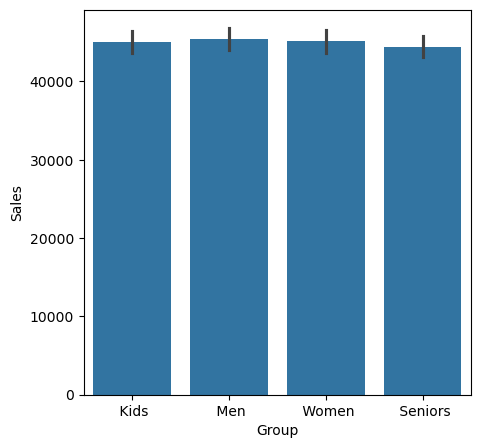

In [61]:
plt.figure(figsize = (5,5))
sns.barplot(x="Group",y="Sales",data = mydata)
plt.show()

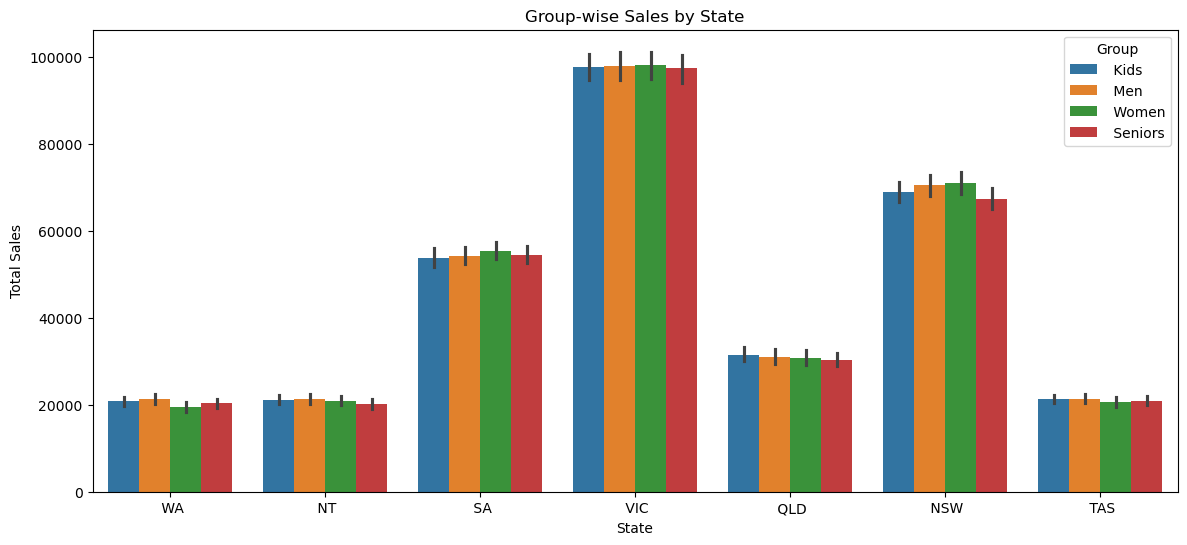

In [62]:
plt.figure(figsize=(14,6))
sns.barplot(x="State", y="Sales", hue="Group", data=mydata)
plt.title("Group-wise Sales by State")
plt.xlabel("State")
plt.ylabel("Total Sales")


plt.show()


Peak Sales Time:  Morning with sales: 114207500
Off-Peak Sales Time:  Evening with sales: 112087500


/var/folders/j_/1182b84s479dx0175nz8csfh0000gn/T/ipykernel_8236/2054526978.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Time', y='Sales', data=time_sales, palette="viridis")


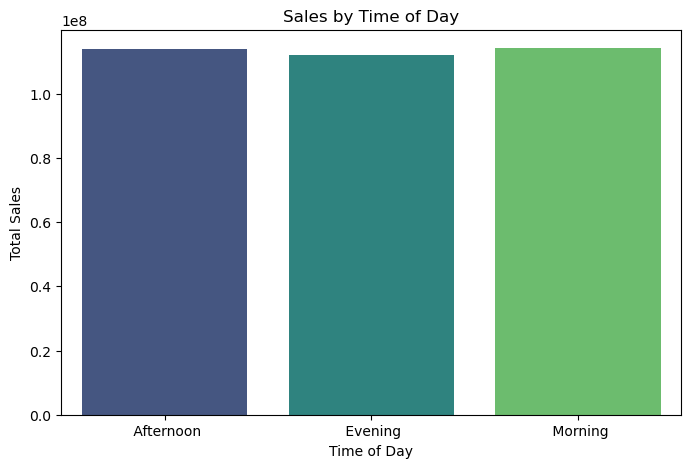

In [67]:
# Group by Time of day and sum sales
time_sales = mydata.groupby('Time', as_index=False)['Sales'].sum()

# Find peak and off-peak
peak_time = time_sales.loc[time_sales['Sales'].idxmax()]
offpeak_time = time_sales.loc[time_sales['Sales'].idxmin()]

print("Peak Sales Time:", peak_time['Time'], "with sales:", peak_time['Sales'])
print("Off-Peak Sales Time:", offpeak_time['Time'], "with sales:", offpeak_time['Sales'])

# Simple bar plot
plt.figure(figsize=(8,5))
sns.barplot(x='Time', y='Sales', data=time_sales, palette="viridis")
plt.title("Sales by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Total Sales")
plt.show()


In [65]:
mydata.columns

Index(['Time', 'State', 'Group', 'Unit', 'Sales', 'Day', 'Month', 'Year'], dtype='object')

REPORT GENERATION----------------

 Sales Programs for Low-Revenue States

We looked at the sales data for all states and found the ones with the lowest total sales. These states need special attention to improve their revenue.

1. Which States Need Help?
The states with the lowest sales are identified by adding up all sales for each state. These states are the focus for sales programs.

2. Who to Target?
We also check which customer groups (Kids, Men, Women, Seniors) are buying the least in these states. This helps us know who to focus our campaigns on.

3. Recommended Actions
Here are some simple ways to improve sales:

Targeted Marketing
   - Give discounts or special offers to groups that buy less.
   - Example: If “Kids” sales are low, run promotions for parents with kids.

Best Time for Promotions
   - Find out when customers buy the most.
   - Schedule offers or campaigns during those times.
Better Product Choices
   - Sell popular products from high-selling states in low-selling states.
   - Adjust inventory to match what customers want.

Local Events
   - Organize pop-up stores, local events, or collaborations.
   - Use local influencers to spread the word.
Track Results
   - Check weekly or monthly sales.
   - Improve campaigns based on what works best.


Doing these steps can:
- Increase sales in low-performing states.
- Reach the right customers with the right products.
- Help the sales and marketing team make smarter, data-driven decisions.
